In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../Warehouse/Warehouse_and_Retail_Sales.csv")
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


# Limpiar

In [3]:
#Filtrar y quedarnos con algunas de las columnas
dataframe = pd.DataFrame(data)
dataframe= dataframe[['YEAR','MONTH','SUPPLIER','ITEM DESCRIPTION','ITEM TYPE','RETAIL SALES']]
dataframe

,YEAR,MONTH,SUPPLIER,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES
0,2017,4,ROYAL WINE CORP,GAMLA CAB - 750ML,WINE,0.00
1,2017,4,SANTA MARGHERITA USA INC,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00
2,2017,4,JIM BEAM BRANDS CO,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00
3,2017,4,HEAVEN HILL DISTILLERIES INC,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00
4,2017,4,ROYAL WINE CORP,RAMON CORDOVA RIOJA - 750ML,WINE,0.00
...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46
128351,2018,2,COASTAL BREWING COMPANY LLC,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08
128352,2018,2,BOSTON BEER CORPORATION,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00
128353,2018,2,NaN,BEER CREDIT,REF,0.00


In [4]:
dataframe.dtypes

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
dtype: object

In [5]:
#Verificar si hay duplicados (y eliminarlos si hubiera)
bool_series = dataframe.duplicated()
bool_series
count = 0
for i in bool_series:
    if i==True:
        count=+1
print(count) #0

#Verificar si hay nulos y eliminarlos
dataframe.isnull().sum()


1


YEAR                 0
MONTH                0
SUPPLIER            24
ITEM DESCRIPTION     0
ITEM TYPE            1
RETAIL SALES         0
dtype: int64

In [6]:
dataframe.describe()

,YEAR,MONTH,RETAIL SALES
count,128355.000000,128355.000000,128355.000000
mean,2017.206030,7.079303,6.563037
std,0.404454,3.645826,28.924944
min,2017.000000,1.000000,-6.490000
25%,2017.000000,5.000000,0.000000
50%,2017.000000,8.000000,0.330000
75%,2017.000000,10.000000,3.250000
max,2018.000000,12.000000,1616.600000


In [7]:
#dataframe.SUPPLIER.dropna()
dataframe.dropna(subset=['SUPPLIER','ITEM TYPE'],inplace=True)
dataframe.isnull().sum()


YEAR                0
MONTH               0
SUPPLIER            0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
dtype: int64

In [8]:
dataframe

,YEAR,MONTH,SUPPLIER,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES
0,2017,4,ROYAL WINE CORP,GAMLA CAB - 750ML,WINE,0.00
1,2017,4,SANTA MARGHERITA USA INC,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00
2,2017,4,JIM BEAM BRANDS CO,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00
3,2017,4,HEAVEN HILL DISTILLERIES INC,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00
4,2017,4,ROYAL WINE CORP,RAMON CORDOVA RIOJA - 750ML,WINE,0.00
...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00
128349,2018,2,COASTAL BREWING COMPANY LLC,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.00
128350,2018,2,ANHEUSER BUSCH INC,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46
128351,2018,2,COASTAL BREWING COMPANY LLC,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08


# Estadísticas


In [9]:
# Preguntas:
# Cuales son las ventas por mes? En qué mes hubieron más ventas?
# Qué tipos de productos son los que más se vendieron? Qué tipos de productos no se vendieron?
# Qué proveedor es del que se vendió mas y menos?
# Cuantos proveedores no tuvieron ventas?
# Cómo se distribuyen las ventas por proveedor?


In [10]:
#Total de ventas por mes
total_month_sales=dataframe.groupby('MONTH')['RETAIL SALES'].sum().sort_values(ascending=True)
#se vende más en diciembre y menos en abril
total_month_sales

MONTH
4          0.00
1      75791.77
2      77804.13
8      87111.78
10     89236.96
9      90452.60
5      94693.49
6      97357.26
11     98316.19
12    131634.49
Name: RETAIL SALES, dtype: float64

In [11]:
product_sales=dataframe.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=False)
product_sales.head()


ITEM TYPE
WINE            313400.42
LIQUOR          309847.85
BEER            209763.11
NON-ALCOHOL       8109.97
STR_SUPPLIES       995.98
Name: RETAIL SALES, dtype: float64

In [12]:
item_type_retail=dataframe.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=True)
#Dunnage y Kegs

In [13]:
supplier_count=dataframe.groupby('SUPPLIER')['ITEM TYPE'].value_counts().sort_values(ascending=False)
supplier_count
#A VINTNERS SELECTIONS  


SUPPLIER                           ITEM TYPE
A VINTNERS SELECTIONS              WINE         7987
REPUBLIC NATIONAL DISTRIBUTING CO  WINE         7801
MONSIEUR TOUTON SELECTION          WINE         4239
LEGENDS LTD                        BEER         4177
E & J GALLO WINERY                 WINE         3990
                                                ... 
FIORE WINERY                       WINE            1
BLACK ANKLE VINEYARDS LLC          WINE            1
URUGUAY IMPORTS LTD                WINE            1
CALVERT BREWING COMPANY            BEER            1
LABATT USA OPERATING CO LLC        KEGS            1
Name: ITEM TYPE, Length: 504, dtype: int64

In [33]:
supplier_sales_min=dataframe.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=True)
supplier_sales_filtered_min=supplier_sales_min[supplier_sales_min!=0]
supplier_sales_filtered_min.head()
supplier_sales_max=dataframe.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False)
supplier_sales_filtered_max=supplier_sales_max[supplier_sales_max!=0]

supplier_sales_filtered_max.head

<bound method NDFrame.head of SUPPLIER
E & J GALLO WINERY               67455.63
DIAGEO NORTH AMERICA INC         57656.36
CONSTELLATION BRANDS             54472.51
ANHEUSER BUSCH INC               42559.14
JIM BEAM BRANDS CO               39156.79
                                   ...   
VINTAGE VIRGINIA APPLES              0.16
FAROPIAN SPIRITS LTD                 0.16
FIORE WINERY                         0.16
BLACK ANKLE VINEYARDS LLC            0.08
PLUME RIDGE IRREVOCABLE TRUST        0.08
Name: RETAIL SALES, Length: 316, dtype: float64>

In [42]:
supplier_sales_filtered_zero=supplier_sales_max[supplier_sales_max==0]
zero_supplier_count=supplier_sales_filtered_zero.count()
total_supplier_count=supplier_sales_max.count()
print("Proveedores con ventas 0: ",zero_supplier_count)
print("Total de proveedores: ",total_supplier_count)
print("Eso representa el ",zero_supplier_count*100/total_supplier_count," %")

Proveedores con ventas 0:  17
Total de proveedores:  333
Eso representa el  5.105105105105105  %


In [15]:


supplier_sales_7=supplier_sales_min[supplier_sales_min>=60000].count()
supplier_sales_6=supplier_sales_min[supplier_sales_min>=50000].count()-supplier_sales_7
supplier_sales_5=supplier_sales_min[supplier_sales_min>=40000].count()-(supplier_sales_7+supplier_sales_6)
supplier_sales_4=supplier_sales_min[supplier_sales_min>=30000].count()-(supplier_sales_7+supplier_sales_6+supplier_sales_5)

supplier_sales_0=supplier_sales_min[supplier_sales_min==0].count()
supplier_sales_1=supplier_sales_min[supplier_sales_min<10000].count()-supplier_sales_0
supplier_sales_2=supplier_sales_min[supplier_sales_min<20000].count()-(supplier_sales_0+supplier_sales_1)
supplier_sales_3=supplier_sales_min[supplier_sales_min<30000].count()-(supplier_sales_0+supplier_sales_1+supplier_sales_2)

#supplier_sales_0#17 proveedores tienen 0 en ventas
#supplier_sales_0+supplier_sales_1+supplier_sales_2+supplier_sales_3+supplier_sales_4+supplier_sales_5+supplier_sales_6+supplier_sales_7
#supplier_sales.count()
# for index, row in supplier_sales.iteritems(): 
#     supplier_sales.drop[index]

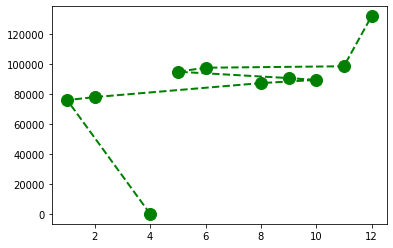

In [16]:
#plt.plot(total_month_sales,'go')
plt.plot(total_month_sales, color='green', marker='o', linestyle='dashed',     linewidth=2, markersize=12)


<AxesSubplot:>

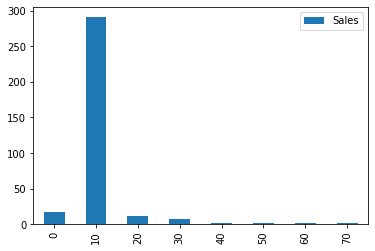

In [17]:
plotdata = pd.DataFrame(
    {"Sales": [supplier_sales_0,supplier_sales_1,supplier_sales_2,supplier_sales_3,
    supplier_sales_4,supplier_sales_5,supplier_sales_6,supplier_sales_7]}, 
    index=["0", "10", "20", "30", "40", "50", "60","70"])
# Plot a bar chart
plotdata.plot(kind="bar")

<AxesSubplot:xlabel='SUPPLIER'>

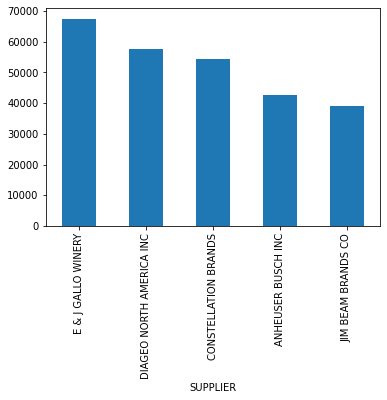

In [30]:
supplier_sales_filtered_max.head().plot.bar()


<AxesSubplot:xlabel='SUPPLIER'>

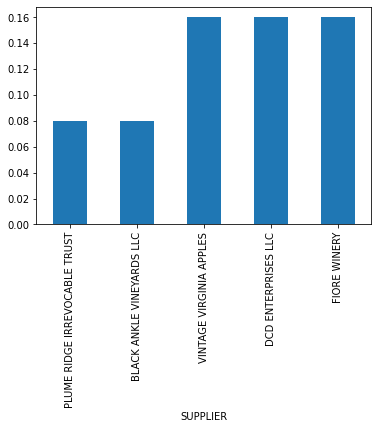

In [32]:
supplier_sales_filtered_min.head().plot.bar()

<AxesSubplot:ylabel='None'>

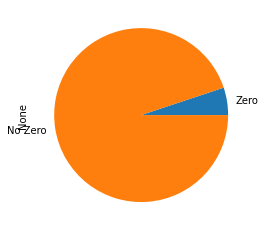

In [46]:
pie_graph=pd.Series(index=["Zero","No Zero"],
data=[zero_supplier_count,total_supplier_count-zero_supplier_count])
pie_graph.plot(kind="pie")


<AxesSubplot:>

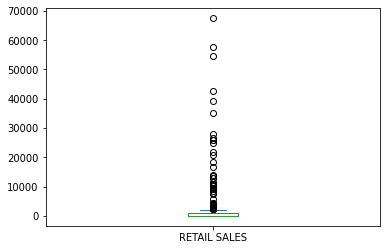

In [18]:
supplier_sales_min.plot.box()

<AxesSubplot:ylabel='Frequency'>

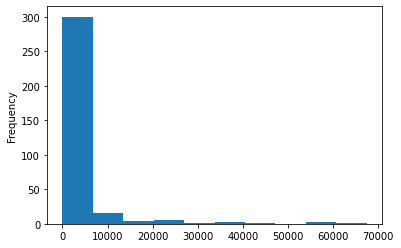

In [19]:
supplier_sales_min.plot.hist()

<AxesSubplot:ylabel='Frequency'>

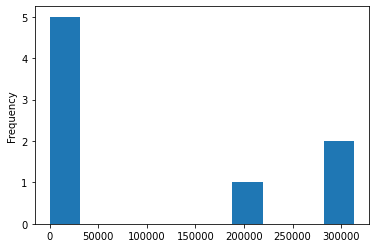

In [20]:
item_type_retail.plot.hist()